# Regularizations with CNNs

## Lab 1 Regularization by Weight Decay & Momentum

Author: M. Rußwurm, 2024, based on notebooks from D.Tuia (2020)

In this lab, we first explore the effect weight decay on training and model parameter. Then we improve training by adding a momentum term to the optimizer.

### Setup

Let's get the required python packages

**d2l** Package:
The "d2l" (short for "dive into deep learning") package is a Python library designed to accompany the book "Dive into Deep Learning"

**Pytoch**:
Pytorch is an open-source machine learning library and scientific computing framework, primarily used for deep learning applications. 

**sklearn.metrics**:
The "sklearn.metrics" module is part of the scikit-learn library, a popular machine learning library in Python. The metrics module specifically focuses on providing tools for evaluating the performance of machine learning models.

In [1]:
!pip install -q d2l

import torch
from torch import nn
from d2l import torch as d2l
from sklearn.metrics import classification_report

/Users/marc/projects/WUR_DL/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Data - FashionMNIST

Let's start by loading FashionMNIST data

Fashion MNIST is a dataset used in machine learning and computer vision, serving as a benchmark for image classification tasks. It consists of 70,000 grayscale images of clothing items, categorized into 10 classes such as t-shirts, dresses, and sneakers. Fashion MNIST is a popular alternative to the traditional handwritten digit MNIST dataset, providing a more complex challenge for developing and testing image recognition algorithms.

/Users/marc/projects/WUR_DL/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/marc/projects/WUR_DL/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/marc/projects/WUR_DL/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/marc/projects/WUR_DL/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module 

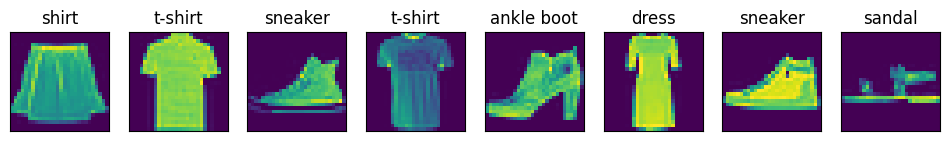

In [2]:
fashionMNIST = d2l.FashionMNIST(batch_size=128)

train_dataloader = fashionMNIST.get_dataloader(train=True)
val_dataloader = fashionMNIST.get_dataloader(train=False)

text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

for batch in train_dataloader:
    X,y = batch
    fashionMNIST.visualize(batch)
    break

In [3]:
@torch.no_grad()
def validate(model, dataloader):
    y_pred = []
    y_true = []
    for X,y in dataloader:
        y_true.append(y)
        y_pred.append(model(X).argmax(1))
        
    y_true = torch.hstack(y_true)
    y_pred = torch.hstack(y_pred)
    
    print(classification_report(y_pred=y_pred.numpy(), y_true=y_true.numpy(), labels=torch.arange(10).numpy(), target_names=text_labels))
    

## Model - Multi-Layer Perceptron

Let's create an 3-layer MLP for this lab

**Task**
* add a `lr` and `weight` to the `__init__` function and store their values in the instance using, for instance `self.lr = ..`. This allows us to modify learning rate and weight decay later without de-defining the entire `MLPModel(d2l.Classifier)` class
* add the `torch.optim.SGD` optimizer to the `configure_optimizers(self)` member function of the classifier

In [4]:
class MLPModel(d2l.Classifier):
    
    # TODO: add lr and weight decay parameters to the init
    #def __init__(self, num_classes=10, ...):
    #    super().__init__()
    #    
    #    self.lr = ...
    #    self.weight_decay = ... 
    
    #SOLUTIONSTART
    def __init__(self, num_classes=10, lr=0.1, weight_decay=1e-4):
        super().__init__()
        
        self.lr = lr
        self.weight_decay=weight_decay
        #SOLUTIONEND
        
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))
        
        self.save_hyperparameters()

    def training_step(self, batch):
        Y_hat = self(*batch[:-1])
        loss = self.loss(Y_hat, batch[-1])
        self.plot('loss', loss, train=True)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=True)
        return loss # the package takes care of the

    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)
        
    def configure_optimizers(self):
        # TODO: implement the torch.optim.SGD optimizer with the self.lr and self.weight_decay parameters that are passed from the init function
        #optimizer = ...
        #SOLUTIONSTART
        optimizer = torch.optim.SGD(self.parameters(), lr=self.lr, 
                               weight_decay=self.weight_decay)
        #SOLUTIONEND
        return optimizer

## Model Run #1 - No Weight Decay

**Tasks**:
* initialize the model defined above with a 1 learning rate and 0 weight decay
* fit the model to the trainer using the `trainer.fit()` function

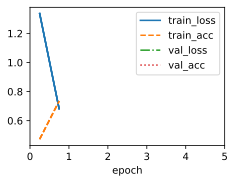

In [ ]:
# TODO: initialize an instance of the model with the learning rate and weight decay specified above
# model = ...
#SOLUTIONSTART
model = MLPModel(lr=1, weight_decay=0)
#SOLUTIONEND

model.layer_summary(X_shape=X.shape)

trainer = d2l.Trainer(max_epochs=5, num_gpus=1)

# TODO: Fit the model
# trainer.fit(...)
#SOLUTIONSTART
trainer.fit(model, fashionMNIST)
#SOLUTIONEND

validate(model, val_dataloader)

The following code 
* iterates throgh all parameters, reshapes them to a vector, and stacks all weight vectors to one `w`. 
* calculates the L2-Norm

In [12]:
w = torch.hstack([param.view(-1) for param in model.parameters() if param.requires_grad])
l2_norm = torch.norm(w, p=2)
print("L2 Norm of all parameters: {:.4f}".format(l2_norm))

## Model Run #2 - Weight decay 0.0001 (or 1e-4)

**Tasks**
* re-train the model from above with the weight decay

In [ ]:
# TODO retrain the model from above
# ...

#SOLUTIONSTART
model = MLPModel(lr=1, weight_decay=1e-4)
model.layer_summary(X_shape=X.shape)

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, fashionMNIST)
#SOLUTIONEND

w = torch.hstack([param.view(-1) for param in model.parameters() if param.requires_grad])
l2_norm = torch.norm(w, p=2)
print("L2 Norm of all parameters: {:.4f}".format(l2_norm))

validate(model, val_dataloader)

## Model Run #3 - Weight decay 0.01 (or 1e-2)

In [ ]:
# TODO retrain the model with the weight decay above
# ...

#SOLUTIONSTART
model = MLPModel(lr=1, weight_decay=1e-2)
model.layer_summary(X_shape=X.shape)

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, fashionMNIST)
#SOLUTIONEND

w = torch.hstack([param.view(-1) for param in model.parameters() if param.requires_grad])
l2_norm = torch.norm(w, p=2)
print("L2 Norm of all parameters: {:.4f}".format(l2_norm))

validate(model, val_dataloader)

## Model Run #4 - Weight decay 0.0001 & Momentum 0.5

**Tasks**
* add a momentum term to the init function as `self.momentum`
* pass it to the optimizer in `def configure_optimizers`

In [ ]:
class MLPModel(d2l.Classifier):
    
    # TODO: add momentum to the init function
    #def __init__(self, lr=0.1, weight_decay=1e-4, num_classes=10, ...):
    #    super().__init__()
    #    self.lr = lr
    #    self.weight_decay = weight_decay
    #    self.mometum = ...
    #SOLUTIONSTART
    def __init__(self, lr=0.1, weight_decay=1e-4, num_classes=10, momentum=0.4):
        super().__init__()
        self.lr = lr
        self.weight_decay = weight_decay
        self.mometum = momentum
        #SOLTUTIONEND
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

    def training_step(self, batch):
        Y_hat = self(*batch[:-1])
        loss = self.loss(Y_hat, batch[-1])
        self.plot('loss', loss, train=True)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=True)
        return loss # the package takes care of the

    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)
        
    def configure_optimizers(self):
        # TODO: implement the torch.optim.SGD optimizer with the self.lr and self.weight_decay parameters that are passed from the init function
        #optimizer = ...
        #SOLUTIONSTART
        optimizer = torch.optim.SGD(self.parameters(), lr=self.lr, 
                               weight_decay=self.weight_decay, momentum=self.momentum)
        #SOLUTIONEND
        return optimizer

In [ ]:
model = MLPModel(lr=1, weight_decay=1e-4, momentum=0.5)
model.layer_summary(X_shape=X.shape)

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, fashionMNIST)

w = torch.hstack([param.view(-1) for param in model.parameters() if param.requires_grad])
l2_norm = torch.norm(w, p=2)
print("L2 Norm of all parameters: {:.4f}".format(l2_norm))

validate(model, val_dataloader)

## Questions

1. How does L2-regularization (i.e., weight decay) in ridge regression affect the norm of parameters of a linear model?

#SOLUTIONSTART
In ridge regression, we would expect that the norm of parameters is always smaller the more weight decay (L2 norm penalization) we apply to the model weights
#SOLUTIONEND

2. How does the weight decay parameter affect the L2 norm of the trained MLP model? Why is it different here?

#SOLUTIONSTART
Here the norms of parameters in runs 2 and 4 (with weight_decay 0.0001) are even larger than without weight decay (run 1). Here, weight decay helps the model to find a path out of a local minimum. The final minimum, that the model found even has a L2 norm of the weights (i,e, is more complex)  
#SOLUTIONEND